Get the data from https://tatoeba.org/en/downloads using the generator at the top of the page

/var/folders/j4/zngd8xzn5bj14jfr2vyygwj40000gn/T/ipykernel_83549/2701971147.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat((df, lang_df[['lang', 'token_ratio']]))


<Axes: title={'center': 'Token Ratio of Translated Sentences to English Sentences n=2451423'}, xlabel='Token Ratio (cl100k_base)', ylabel='Language'>

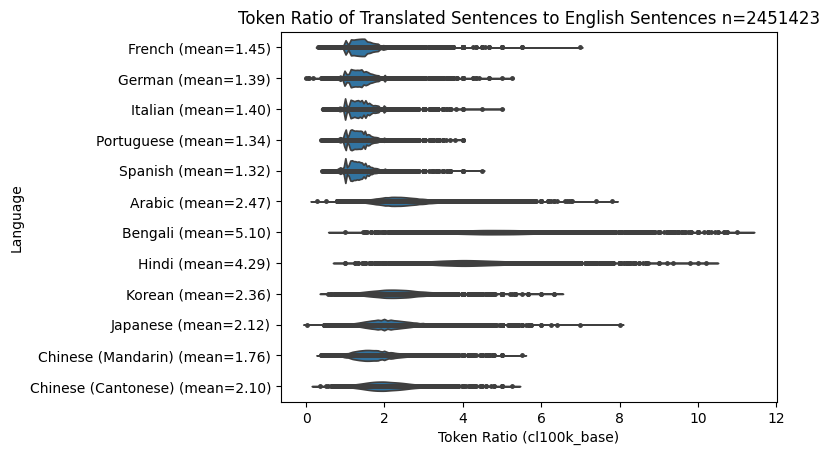

In [19]:
import seaborn as sns
import pandas as pd
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")

en_fr_df = pd.read_csv('data/en_fr_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ar_df = pd.read_csv('data/en_ar_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_de_df = pd.read_csv('data/en_de_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_es_df = pd.read_csv('data/en_es_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_po_df = pd.read_csv('data/en_po_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_fr_df = pd.read_csv('data/en_fr_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_it_df = pd.read_csv('data/en_it_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')

en_ben_df = pd.read_csv('data/en_ben_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_hi_df = pd.read_csv('data/en_hi_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ja_df = pd.read_csv('data/en_ja_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ko_df = pd.read_csv('data/en_ko_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_cn_man_df = pd.read_csv('data/en_cn-man_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_cn_can_df = pd.read_csv('data/en_cn-can_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')

df = pd.DataFrame(columns=['lang', 'token_ratio'])

for lang, lang_df in zip(
        ['French', 'German', 'Italian', 'Portuguese', 'Spanish', 'Arabic', 'Bengali', 'Hindi', 'Korean', 'Japanese',  'Chinese (Mandarin)', 'Chinese (Cantonese)'], 
        [en_fr_df, en_de_df, en_it_df, en_po_df, en_es_df, en_ar_df, en_ben_df, en_hi_df, en_ko_df, en_ja_df, en_cn_man_df, en_cn_can_df]
    ):
    lang_df.dropna(inplace=True)
    lang_df['sentence_token_length'] = lang_df['text'].apply(lambda x: len(enc.encode(x)))
    lang_df['eng_sentence_token_length'] = lang_df['eng_text'].apply(lambda x: len(enc.encode(x)))

    lang_df['token_ratio'] = lang_df['sentence_token_length'] / lang_df['eng_sentence_token_length']
    mean = lang_df['token_ratio'].mean()
    lang_df['lang'] = f"{lang} (mean={mean:.2f})"
    df = pd.concat((df, lang_df[['lang', 'token_ratio']]))

fig = sns.violinplot(data=df, x="token_ratio", y="lang", inner="point")


fig.set_title(f'Token Ratio of Translated Sentences to English Sentences n={len(df)}')
fig.set(xlabel='Token Ratio (cl100k_base)', ylabel='Language')

fig